<a href="https://colab.research.google.com/github/DHarrington11/assignment3/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning CNNs using Fashion-MNIST

This assignment will bulld CNNS using the Fashion-MINST dataset. In particular, we will
*   Use MNIST Fashion to study CNN architectures and parameters.

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



## Assignment Overview


This assignment focuses on how to classify **fashion_mnist** data with a simple **Convolutional Neural Network** in Keras. 
Keras is part of the core TensorFlow library, in addition to being an independent open source project. 

The [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist) dataset consists of 
60,000 train and 10,000 test instances. The aim is to classify an image into one of 10 categories. The possible categories/labals are:

<br> **Label**	**Description**
<br> 0 T-shirt/top
<br> 1 Trouser
<br> 2 Pullover
<br> 3 Dress
<br> 4 Coat
<br> 5 Sandal
<br> 6 Shirt
<br> 7 Sneaker
<br> 8 Bag
<br> 9 Ankle boot

Each gray-scale input is a 28x28 low-resolution image.

>>[Learning CNNs using Fashion-MNIST](#scrollTo=XLMRPLVCFwEc)

>>[Notebook Overview](#scrollTo=Ixyte299ZZgk)

>>[Download the fashion_mnist data](#scrollTo=LbCigZtNZZgl)

>>[Visualize the data](#scrollTo=tWORMSC8FDR4)

>>[Data normalization](#scrollTo=Zx-Ee6LHZZgt)

>>[Split the data into train/validation/test data sets](#scrollTo=CFlNHktHBtru)

>>[Create the basic model architecture](#scrollTo=HhalcO03ZZg3)

>>[Compile the model](#scrollTo=FhxJ5dinZZg8)

>>[Train the model](#scrollTo=DtOvh3YVZZg_)

>>[Load Model with the best validation accuracy](#scrollTo=e-MGLwZQy05d)

>>[Test Accuracy](#scrollTo=9RTRkan4yq5H)

>>[Visualize prediction](#scrollTo=oJv7XEk10bOv)

>>[Congragulations!](#scrollTo=8AehWdRAVKN5)



## Download the fashion_mnist data
First let's install TensorFlow version 1.8.0 and import Tensorflow. Then we download fashion-mnist which is one of the Keras datasets. 

In [20]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


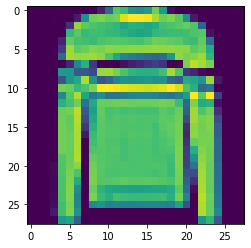

In [ ]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [ ]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Create the basic model architecture

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this assignment we are using the Sequential model API. 
If you are interested in a tutorial using the Functional API, checkout Sara Robinson's blog [Predicting the price of wine with the Keras Functional API and TensorFlow](https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03).

In defining the model we will be using some of these Keras APIs:
*   Conv2D() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - create a convolutional layer 
*   Pooling() [link text](https://keras.io/layers/pooling/) - create a pooling layer 
*   Dropout() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - apply drop out 

In the basic architecture we create two convolutional layers, and then an inference layer. 

The key parameters for a convolution layer are: 
for convolution--(a) number of convolution filters; (b) kernel size;
for pooling--kernel for pooling-size;
for dropout--dropout probability. We will refer to these as the convolution-layer parameters.

The inference-layer parameters are:
(a) hidden layer vector-size and activation;
(b) dropout probability;
(c) output-layer activation.

When we design a network we can specify the CNN model using these parameters.

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size =2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

## Compile the model
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer 
*   A loss function 
*   A list of metrics 


In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.6145 - accuracy: 0.7725
Epoch 00001: val_loss improved from inf to 0.38737, saving model to model.weights.best.hdf5
860/860 [==============================] - 22s 10ms/step - loss: 0.6145 - accuracy: 0.7725 - val_loss: 0.3874 - val_accuracy: 0.8628
Epoch 2/10
860/860 [==============================] - ETA: 0s - loss: 0.4196 - accuracy: 0.8482
Epoch 00002: val_loss improved from 0.38737 to 0.33399, saving model to model.weights.best.hdf5
860/860 [==============================] - 8s 10ms/step - loss: 0.4196 - accuracy: 0.8482 - val_loss: 0.3340 - val_accuracy: 0.8824
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.8629
Epoch 00003: val_loss improved from 0.33399 to 0.29478, saving model to model.weights.best.hdf5
860/860 [==============================] - 8s 10ms/step - loss: 0.3750 - accuracy: 0.8629 - val_loss: 0.2948 - val_accuracy: 0.8942
Epoch 4/10
856/860 [===========

## Load Model with the best validation accuracy

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## Test Accuracy

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9092000126838684


## Visualize prediction
Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

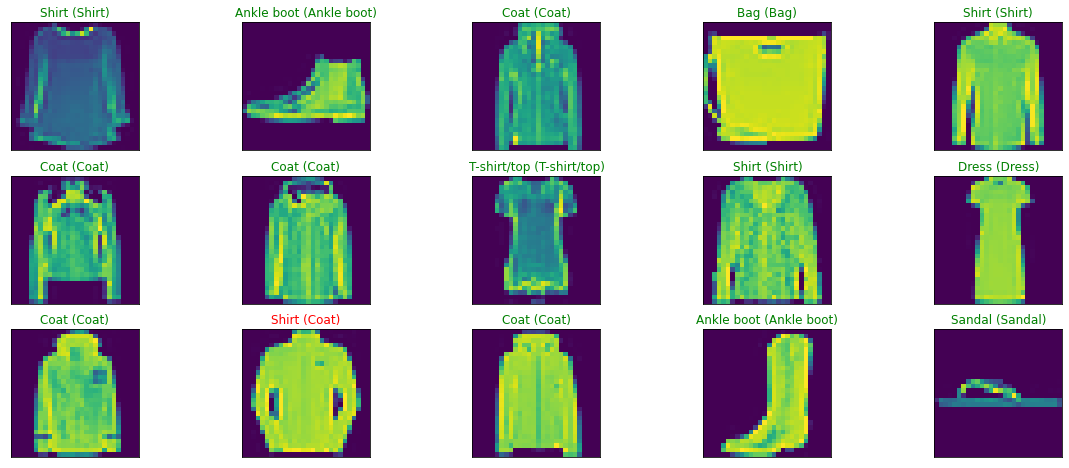

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Task 1: Architecture Comparison
The code given above is called the baseline architecture, and will successfully train a CNN to classify fashion-MNIST with near 90% accuracy.
We now want to compare other different architectures.

Each group must run 10 additional architectures:


*   2 different combination of number of filters
*   2 different combinations of kernels for (convolution, pooling)
*   2 different dropout probability values
*   1 new architecture with more layers
*   3 experiments with combined changes

Report the results in a table with the first column describing the architecture and the second column the predictive accuracy of the model on the data.

Describe how the changes to architecture influence the change in accuracy, if there is any significant change. Specifically, describe:
* impact of number of filters
* impact of kernel size
* impact of dropout probability
* impact of number of layers
* impact of combining multiple changes.

## Task 2: TensorFlow coding of model
The second main task is to rewrite the high-level Keras code for the model using TensorFlow. The necessary code fragments are noted below. Please fill in the outstanding code and replace the Keras model with your TensorFlow model. Then compile the code to run the basic model configuration (baseline model).




# Task 1

## Architecture 1 
### Changing number of filters 
- Filter in 1st layer is changed from 64 to 128
- Filter in 2nd layer is changed from 32 to 64

In [ ]:
model1 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 128)       640       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 14, 14, 128)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 7, 7, 64)        

In [ ]:
model1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist1 = model1.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.5405 - accuracy: 0.8015
Epoch 00001: val_loss improved from inf to 0.33848, saving model to model.weights.best.hdf5
860/860 [==============================] - 12s 14ms/step - loss: 0.5405 - accuracy: 0.8015 - val_loss: 0.3385 - val_accuracy: 0.8822
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.3746 - accuracy: 0.8640
Epoch 00002: val_loss improved from 0.33848 to 0.29261, saving model to model.weights.best.hdf5
860/860 [==============================] - 11s 13ms/step - loss: 0.3746 - accuracy: 0.8639 - val_loss: 0.2926 - val_accuracy: 0.8956
Epoch 3/10
857/860 [============================>.] - ETA: 0s - loss: 0.3292 - accuracy: 0.8799
Epoch 00003: val_loss improved from 0.29261 to 0.26811, saving model to model.weights.best.hdf5
860/860 [==============================] - 12s 14ms/step - loss: 0.3293 - accuracy: 0.8798 - val_loss: 0.2681 - val_accuracy: 0.9020
Epoch 4/10
856/860 [=========

In [ ]:
model1.load_weights('model.weights.best.hdf5')

313/313 - 1s - loss: 0.2372 - accuracy: 0.9144 - 1s/epoch - 4ms/step


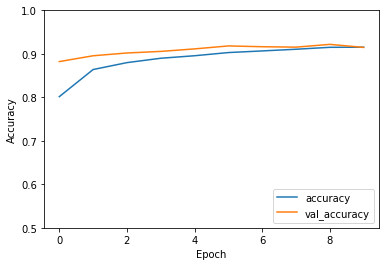

In [ ]:
plt.plot(hist1.history['accuracy'], label='accuracy')
plt.plot(hist1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)

In [ ]:
# Evaluate the model on test set
score1 = model1.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score1[1])


 Test accuracy: 0.9143999814987183


## Architecture 2 - changing no of filters
- changing 1st convolutional layer and 2nd convolutional layer from 32 to 64 

In [ ]:
model2 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.3))

model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.3))

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 64)         

In [ ]:
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist2 = model2.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7972
Epoch 00001: val_loss improved from inf to 0.34776, saving model to model.weights.best.hdf5
860/860 [==============================] - 9s 10ms/step - loss: 0.5560 - accuracy: 0.7972 - val_loss: 0.3478 - val_accuracy: 0.8758
Epoch 2/10
856/860 [============================>.] - ETA: 0s - loss: 0.3879 - accuracy: 0.8604
Epoch 00002: val_loss improved from 0.34776 to 0.31035, saving model to model.weights.best.hdf5
860/860 [==============================] - 9s 10ms/step - loss: 0.3876 - accuracy: 0.8605 - val_loss: 0.3104 - val_accuracy: 0.8882
Epoch 3/10
858/860 [============================>.] - ETA: 0s - loss: 0.3429 - accuracy: 0.8747
Epoch 00003: val_loss improved from 0.31035 to 0.27561, saving model to model.weights.best.hdf5
860/860 [==============================] - 9s 10ms/step - loss: 0.3428 - accuracy: 0.8747 - val_loss: 0.2756 - val_accuracy: 0.8978
Epoch 4/10
857/860 [============

In [ ]:
model2.load_weights('model.weights.best.hdf5')

313/313 - 1s - loss: 0.2377 - accuracy: 0.9120 - 1s/epoch - 4ms/step


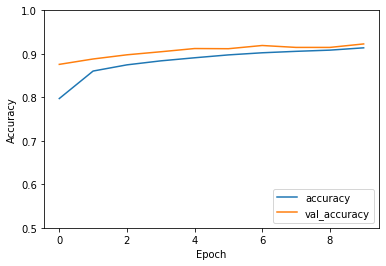

In [ ]:
plt.plot(hist2.history['accuracy'], label='accuracy')
plt.plot(hist2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)

In [ ]:
# Evaluate the model on test set
score2 = model2.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score2[1])


 Test accuracy: 0.9120000004768372


## Architecture 3 - different combinations of kernels for convolutional and pooling 
### 1st Layer 
- convolutional kernel size 5x5 
- pooling kernel size 5x5
### 2nd layer 
- convolutional kernel size 5x5
- pooling kernel size 5x5

In [ ]:
model3 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1))) 
model3.add(tf.keras.layers.MaxPooling2D(pool_size=5))
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=5))
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 32)          51232     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 1, 1, 32)         

In [ ]:
model3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist3 = model3.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.8396 - accuracy: 0.6833
Epoch 00001: val_loss improved from inf to 0.45746, saving model to model.weights.best.hdf5
860/860 [==============================] - 9s 10ms/step - loss: 0.8396 - accuracy: 0.6833 - val_loss: 0.4575 - val_accuracy: 0.8194
Epoch 2/10
854/860 [============================>.] - ETA: 0s - loss: 0.5435 - accuracy: 0.8010
Epoch 00002: val_loss improved from 0.45746 to 0.37224, saving model to model.weights.best.hdf5
860/860 [==============================] - 8s 9ms/step - loss: 0.5433 - accuracy: 0.8010 - val_loss: 0.3722 - val_accuracy: 0.8662
Epoch 3/10
857/860 [============================>.] - ETA: 0s - loss: 0.4826 - accuracy: 0.8247
Epoch 00003: val_loss improved from 0.37224 to 0.33148, saving model to model.weights.best.hdf5
860/860 [==============================] - 8s 9ms/step - loss: 0.4822 - accuracy: 0.8249 - val_loss: 0.3315 - val_accuracy: 0.8838
Epoch 4/10
855/860 [==============

In [ ]:
model3.load_weights('model.weights.best.hdf5')

313/313 - 1s - loss: 0.3192 - accuracy: 0.8799 - 1s/epoch - 4ms/step


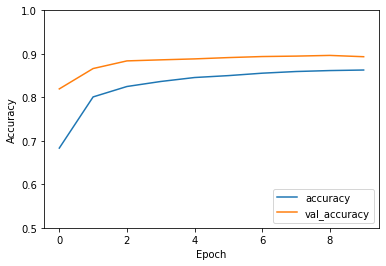

In [ ]:
plt.plot(hist3.history['accuracy'], label='accuracy')
plt.plot(hist3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model3.evaluate(x_test,  y_test, verbose=2)

In [ ]:
# Evaluate the model on test set
score3 = model3.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score3[1])


 Test accuracy: 0.8798999786376953


## Architecture 4 - changing combinations of kernels for convolutional and pooling 
### 1st Layer 
- convolutional = 3x3
- pooling = 3x3
### 2nd layer 
- convolutional = 3x3  
- pooling = 3x3

In [ ]:
model4 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model4.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model4.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model4.add(tf.keras.layers.Dropout(0.3))

model4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model4.add(tf.keras.layers.Dropout(0.3))

model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(256, activation='relu'))
model4.add(tf.keras.layers.Dropout(0.5))
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 9, 9, 64)          0         
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 3, 3, 32)         

In [ ]:
model4.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist4 = model4.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.7640 - accuracy: 0.7172
Epoch 00001: val_loss improved from inf to 0.42742, saving model to model.weights.best.hdf5
860/860 [==============================] - 9s 9ms/step - loss: 0.7640 - accuracy: 0.7172 - val_loss: 0.4274 - val_accuracy: 0.8424
Epoch 2/10
854/860 [============================>.] - ETA: 0s - loss: 0.4896 - accuracy: 0.8202
Epoch 00002: val_loss improved from 0.42742 to 0.35054, saving model to model.weights.best.hdf5
860/860 [==============================] - 8s 9ms/step - loss: 0.4894 - accuracy: 0.8203 - val_loss: 0.3505 - val_accuracy: 0.8658
Epoch 3/10
857/860 [============================>.] - ETA: 0s - loss: 0.4264 - accuracy: 0.8450
Epoch 00003: val_loss improved from 0.35054 to 0.30488, saving model to model.weights.best.hdf5
860/860 [==============================] - 7s 9ms/step - loss: 0.4261 - accuracy: 0.8451 - val_loss: 0.3049 - val_accuracy: 0.8916
Epoch 4/10
855/860 [===============

In [ ]:
model4.load_weights('model.weights.best.hdf5')

313/313 - 1s - loss: 0.2685 - accuracy: 0.8983 - 1s/epoch - 4ms/step


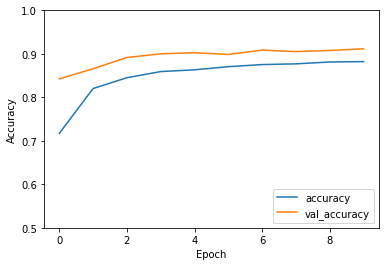

In [ ]:
plt.plot(hist4.history['accuracy'], label='accuracy')
plt.plot(hist4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model4.evaluate(x_test,  y_test, verbose=2)

In [ ]:
# Evaluate the model on test set
score4 = model4.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score4[1])


 Test accuracy: 0.8982999920845032


## Architecture 5 - different dropout probabilities
- changing from 0.3 to 0.4 in first layer 
- changing from 0.3 to 0.4 in second layer

In [ ]:
model5 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model5.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model5.add(tf.keras.layers.Dropout(0.4))

model5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model5.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model5.add(tf.keras.layers.Dropout(0.4))

model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(256, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 7, 7, 32)         

In [ ]:
model5.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist5 = model5.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.6645 - accuracy: 0.7526
Epoch 00001: val_loss improved from inf to 0.41502, saving model to model.weights.best.hdf5
860/860 [==============================] - 8s 9ms/step - loss: 0.6645 - accuracy: 0.7526 - val_loss: 0.4150 - val_accuracy: 0.8588
Epoch 2/10
856/860 [============================>.] - ETA: 0s - loss: 0.4656 - accuracy: 0.8298
Epoch 00002: val_loss improved from 0.41502 to 0.35282, saving model to model.weights.best.hdf5
860/860 [==============================] - 7s 8ms/step - loss: 0.4654 - accuracy: 0.8299 - val_loss: 0.3528 - val_accuracy: 0.8750
Epoch 3/10
856/860 [============================>.] - ETA: 0s - loss: 0.4187 - accuracy: 0.8473
Epoch 00003: val_loss improved from 0.35282 to 0.32057, saving model to model.weights.best.hdf5
860/860 [==============================] - 7s 8ms/step - loss: 0.4187 - accuracy: 0.8472 - val_loss: 0.3206 - val_accuracy: 0.8862
Epoch 4/10
857/860 [===============

In [ ]:
model5.load_weights('model.weights.best.hdf5')

313/313 - 1s - loss: 0.2694 - accuracy: 0.9021 - 1s/epoch - 3ms/step


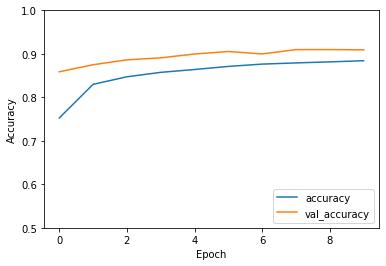

In [ ]:
plt.plot(hist5.history['accuracy'], label='accuracy')
plt.plot(hist5.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model5.evaluate(x_test,  y_test, verbose=2)

In [ ]:
score5 = model5.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score5[1])


 Test accuracy: 0.9021000266075134


## Architecture 6 - changing dropout probabilites 
- 1st layer changed to 0.25
- 2nd layer changed to 0.25 

In [ ]:
model6 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model6.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model6.add(tf.keras.layers.Dropout(0.25))

model6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model6.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model6.add(tf.keras.layers.Dropout(0.25))

model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dense(256, activation='relu'))
model6.add(tf.keras.layers.Dropout(0.5))
model6.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 7, 7, 32)         

In [ ]:
model6.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist6=model6.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
855/860 [============================>.] - ETA: 0s - loss: 0.6047 - accuracy: 0.7769
Epoch 00001: val_loss improved from inf to 0.37384, saving model to model.weights.best.hdf5
860/860 [==============================] - 8s 8ms/step - loss: 0.6036 - accuracy: 0.7774 - val_loss: 0.3738 - val_accuracy: 0.8692
Epoch 2/10
854/860 [============================>.] - ETA: 0s - loss: 0.4144 - accuracy: 0.8491
Epoch 00002: val_loss improved from 0.37384 to 0.32195, saving model to model.weights.best.hdf5
860/860 [==============================] - 7s 8ms/step - loss: 0.4143 - accuracy: 0.8491 - val_loss: 0.3219 - val_accuracy: 0.8858
Epoch 3/10
854/860 [============================>.] - ETA: 0s - loss: 0.3699 - accuracy: 0.8669
Epoch 00003: val_loss improved from 0.32195 to 0.28822, saving model to model.weights.best.hdf5
860/860 [==============================] - 7s 8ms/step - loss: 0.3698 - accuracy: 0.8670 - val_loss: 0.2882 - val_accuracy: 0.8952
Epoch 4/10
857/860 [===============

In [ ]:
model6.load_weights('model.weights.best.hdf5')

313/313 - 1s - loss: 0.2464 - accuracy: 0.9120 - 1s/epoch - 3ms/step


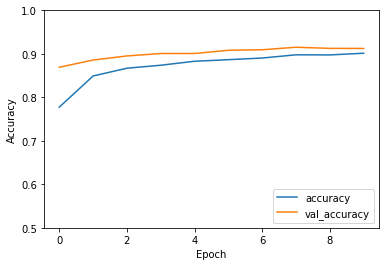

In [ ]:
plt.plot(hist6.history['accuracy'], label='accuracy')
plt.plot(hist6.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model6.evaluate(x_test,  y_test, verbose=2)

In [ ]:
score6 = model6.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score6[1])


 Test accuracy: 0.9120000004768372


## Architecture 7 - 1 more layer
### 3rd layer 
- convolutinal = filter - 32, kernel size - 2x2
- pooling = kernel size - 2x2
- dropout = 0.3

In [ ]:
model7 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model7.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model7.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model7.add(tf.keras.layers.Dropout(0.3))

model7.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model7.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model7.add(tf.keras.layers.Dropout(0.3))

#new layer
model7.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model7.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model7.add(tf.keras.layers.Dropout(0.3))

model7.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model7.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model7.add(tf.keras.layers.Dropout(0.3))

model7.add(tf.keras.layers.Flatten())
model7.add(tf.keras.layers.Dense(256, activation='relu'))
model7.add(tf.keras.layers.Dropout(0.5))
model7.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 7, 7, 32)         

In [ ]:
model7.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist7=model7.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 1.1756 - accuracy: 0.5384
Epoch 00001: val_loss improved from inf to 0.67276, saving model to model.weights.best.hdf5
860/860 [==============================] - 9s 10ms/step - loss: 1.1756 - accuracy: 0.5384 - val_loss: 0.6728 - val_accuracy: 0.7272
Epoch 2/10
856/860 [============================>.] - ETA: 0s - loss: 0.7693 - accuracy: 0.7017
Epoch 00002: val_loss improved from 0.67276 to 0.58580, saving model to model.weights.best.hdf5
860/860 [==============================] - 8s 9ms/step - loss: 0.7694 - accuracy: 0.7017 - val_loss: 0.5858 - val_accuracy: 0.7656
Epoch 3/10
858/860 [============================>.] - ETA: 0s - loss: 0.6955 - accuracy: 0.7337
Epoch 00003: val_loss improved from 0.58580 to 0.52565, saving model to model.weights.best.hdf5
860/860 [==============================] - 8s 9ms/step - loss: 0.6955 - accuracy: 0.7337 - val_loss: 0.5256 - val_accuracy: 0.8140
Epoch 4/10
858/860 [==============

In [ ]:
model7.load_weights('model.weights.best.hdf5')

313/313 - 1s - loss: 0.4042 - accuracy: 0.8532 - 1s/epoch - 3ms/step


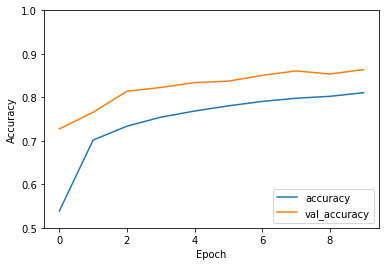

In [ ]:
plt.plot(hist7.history['accuracy'], label='accuracy')
plt.plot(hist7.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model7.evaluate(x_test,  y_test, verbose=2)

In [ ]:
score7 = model7.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score7[1])


 Test accuracy: 0.8532000184059143


## Architecture 8 - combined changes 
### 1st layer
- Convolutional(filter = 32, kernel size = 4x4, activation=relu) 
- Pooling(kernel size =2x2)
- Dropout(0.3)
### 2nd layer
- Convolutional(filter = 32, kernel size = 4x4, activaion = relu)
- pooling(kernel size = 2x2) 
- dropout(0.3)

In [ ]:
model8 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model8.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding='same', activation='relu', input_shape=(28,28,1))) 
model8.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model8.add(tf.keras.layers.Dropout(0.3))

model8.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding='same', activation='relu'))
model8.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model8.add(tf.keras.layers.Dropout(0.3))

model8.add(tf.keras.layers.Flatten())
model8.add(tf.keras.layers.Dense(256, activation='relu'))
model8.add(tf.keras.layers.Dropout(0.5))
model8.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 32)        16416     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 7, 7, 32)         

In [ ]:
model8.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist8=model8.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.5856 - accuracy: 0.7852
Epoch 00001: val_loss improved from inf to 0.35918, saving model to model.weights.best.hdf5
860/860 [==============================] - 9s 9ms/step - loss: 0.5856 - accuracy: 0.7852 - val_loss: 0.3592 - val_accuracy: 0.8746
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.3868 - accuracy: 0.8596
Epoch 00002: val_loss improved from 0.35918 to 0.29494, saving model to model.weights.best.hdf5
860/860 [==============================] - 8s 9ms/step - loss: 0.3868 - accuracy: 0.8596 - val_loss: 0.2949 - val_accuracy: 0.8944
Epoch 3/10
855/860 [============================>.] - ETA: 0s - loss: 0.3397 - accuracy: 0.8765
Epoch 00003: val_loss improved from 0.29494 to 0.26368, saving model to model.weights.best.hdf5
860/860 [==============================] - 7s 9ms/step - loss: 0.3395 - accuracy: 0.8766 - val_loss: 0.2637 - val_accuracy: 0.9038
Epoch 4/10
855/860 [===============

In [ ]:
model8.load_weights('model.weights.best.hdf5')

313/313 - 1s - loss: 0.2351 - accuracy: 0.9115 - 1s/epoch - 4ms/step


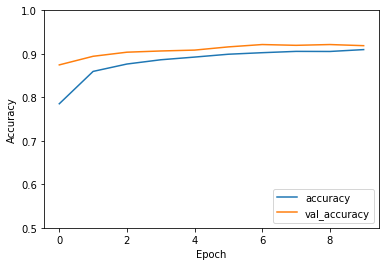

In [ ]:
plt.plot(hist8.history['accuracy'], label='accuracy')
plt.plot(hist8.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model8.evaluate(x_test,  y_test, verbose=2)

In [ ]:
score8 = model8.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score8[1])


 Test accuracy: 0.9114999771118164


## Architecture 9 - Combined changes 
### 1st Layer 
- Convolutional(filters = 32, kernel size= 5, activation = relu) 
- pooling( kernel size = 2)
- dropout =(0.2)
### 2nd Layer
- convolutional(filters = 32, kernel size = 5, activation = relu)
- pooling( kernel size = 2)
- dropout(0.3)

In [ ]:
model9 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model9.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1))) 
model9.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model9.add(tf.keras.layers.Dropout(0.2))

model9.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu'))
model9.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model9.add(tf.keras.layers.Dropout(0.3))

model9.add(tf.keras.layers.Flatten())
model9.add(tf.keras.layers.Dense(256, activation='relu'))
model9.add(tf.keras.layers.Dropout(0.5))
model9.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 7, 7, 32)         

In [ ]:
model9.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist9=model9.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.5614 - accuracy: 0.7964
Epoch 00001: val_loss improved from inf to 0.33372, saving model to model.weights.best.hdf5
860/860 [==============================] - 9s 10ms/step - loss: 0.5614 - accuracy: 0.7964 - val_loss: 0.3337 - val_accuracy: 0.8784
Epoch 2/10
860/860 [==============================] - ETA: 0s - loss: 0.3693 - accuracy: 0.8682
Epoch 00002: val_loss improved from 0.33372 to 0.28014, saving model to model.weights.best.hdf5
860/860 [==============================] - 8s 9ms/step - loss: 0.3693 - accuracy: 0.8682 - val_loss: 0.2801 - val_accuracy: 0.8974
Epoch 3/10
856/860 [============================>.] - ETA: 0s - loss: 0.3255 - accuracy: 0.8809
Epoch 00003: val_loss improved from 0.28014 to 0.25803, saving model to model.weights.best.hdf5
860/860 [==============================] - 7s 9ms/step - loss: 0.3252 - accuracy: 0.8810 - val_loss: 0.2580 - val_accuracy: 0.9030
Epoch 4/10
856/860 [==============

In [ ]:
model9.load_weights('model.weights.best.hdf5')

313/313 - 1s - loss: 0.2361 - accuracy: 0.9128 - 1s/epoch - 4ms/step


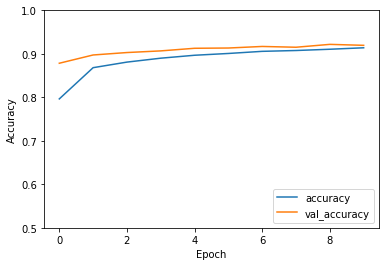

In [ ]:
plt.plot(hist9.history['accuracy'], label='accuracy')
plt.plot(hist9.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model9.evaluate(x_test,  y_test, verbose=2)

In [ ]:
score9 = model9.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score9[1])


 Test accuracy: 0.9128000140190125


## Architecture 10 - Combined changes 
### 1st layer 
- convolutional( filter = 64, kernel size = 5x5, activation = relu)
- pooling( kernel size = 3x3)
- dropot(0.4)
### 2nd Layer
- convolutional( filter = 64, kernel size = 5x5, activation = relu) 
- pooling (kernel size = 3x3)
- dropout(0.3)

In [ ]:
model10 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model10.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1))) 
model10.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model10.add(tf.keras.layers.Dropout(0.4))

model10.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
model10.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model10.add(tf.keras.layers.Dropout(0.3))

model10.add(tf.keras.layers.Flatten())
model10.add(tf.keras.layers.Dense(256, activation='relu'))
model10.add(tf.keras.layers.Dropout(0.5))
model10.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 9, 9, 64)          0         
                                                                 
 conv2d_23 (Conv2D)          (None, 9, 9, 64)          102464    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 3, 3, 64)        

In [ ]:
model10.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist10=model10.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.6420 - accuracy: 0.7635
Epoch 00001: val_loss improved from inf to 0.36469, saving model to model.weights.best.hdf5
860/860 [==============================] - 9s 10ms/step - loss: 0.6420 - accuracy: 0.7635 - val_loss: 0.3647 - val_accuracy: 0.8746
Epoch 2/10
858/860 [============================>.] - ETA: 0s - loss: 0.4055 - accuracy: 0.8531
Epoch 00002: val_loss improved from 0.36469 to 0.33895, saving model to model.weights.best.hdf5
860/860 [==============================] - 7s 9ms/step - loss: 0.4055 - accuracy: 0.8530 - val_loss: 0.3390 - val_accuracy: 0.8770
Epoch 3/10
860/860 [==============================] - ETA: 0s - loss: 0.3584 - accuracy: 0.8708
Epoch 00003: val_loss improved from 0.33895 to 0.26960, saving model to model.weights.best.hdf5
860/860 [==============================] - 7s 9ms/step - loss: 0.3584 - accuracy: 0.8708 - val_loss: 0.2696 - val_accuracy: 0.9010
Epoch 4/10
855/860 [==============

In [ ]:
model10.load_weights('model.weights.best.hdf5')

313/313 - 1s - loss: 0.2518 - accuracy: 0.9073 - 1s/epoch - 4ms/step


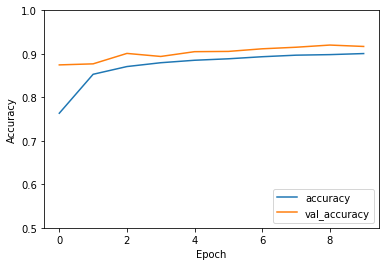

In [ ]:
plt.plot(hist10.history['accuracy'], label='accuracy')
plt.plot(hist10.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model10.evaluate(x_test,  y_test, verbose=2)

In [ ]:
score10 = model10.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score10[1])


 Test accuracy: 0.9072999954223633


# Model 11 - Multiple Changes


In [ ]:
model11 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model11.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model11.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model11.add(tf.keras.layers.Dropout(0.4))

model11.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model11.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model11.add(tf.keras.layers.Dropout(0.3))

model11.add(tf.keras.layers.Flatten())
model11.add(tf.keras.layers.Dense(256, activation='relu'))
model11.add(tf.keras.layers.Dropout(0.5))
model11.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 64)        16448     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 7, 7, 64)        

In [ ]:
model11.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hist11=model11.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
855/860 [============================>.] - ETA: 0s - loss: 0.5797 - accuracy: 0.7884
Epoch 00001: val_loss improved from inf to 0.35374, saving model to model.weights.best.hdf5
860/860 [==============================] - 10s 10ms/step - loss: 0.5787 - accuracy: 0.7886 - val_loss: 0.3537 - val_accuracy: 0.8738
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.3985 - accuracy: 0.8547
Epoch 00002: val_loss improved from 0.35374 to 0.30661, saving model to model.weights.best.hdf5
860/860 [==============================] - 9s 10ms/step - loss: 0.3984 - accuracy: 0.8546 - val_loss: 0.3066 - val_accuracy: 0.8882
Epoch 3/10
856/860 [============================>.] - ETA: 0s - loss: 0.3527 - accuracy: 0.8706
Epoch 00003: val_loss improved from 0.30661 to 0.28210, saving model to model.weights.best.hdf5
860/860 [==============================] - 9s 10ms/step - loss: 0.3527 - accuracy: 0.8706 - val_loss: 0.2821 - val_accuracy: 0.8974
Epoch 4/10
858/860 [===========

In [ ]:
model11.load_weights('model.weights.best.hdf5')

313/313 - 1s - loss: 0.2362 - accuracy: 0.9148 - 1s/epoch - 4ms/step


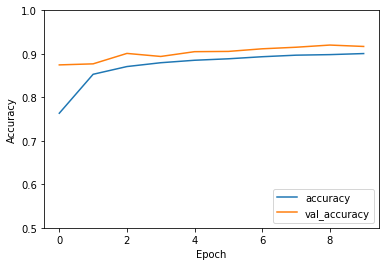

In [ ]:
plt.plot(hist10.history['accuracy'], label='accuracy')
plt.plot(hist10.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model11.evaluate(x_test,  y_test, verbose=2)

In [ ]:
score11 = model11.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score11[1])


 Test accuracy: 0.9147999882698059


In [ ]:
scoreList=[score, score1,
           score2, score3, 
           score4, score5, score6, score7, score8, score9, score10, score11]
for x in range(0,12):
  print('Test Prediction for model{} = {}'.format(x,scoreList[x][1]))

Test Prediction for model0 = 0.9092000126838684
Test Prediction for model1 = 0.9143999814987183
Test Prediction for model2 = 0.9120000004768372
Test Prediction for model3 = 0.8798999786376953
Test Prediction for model4 = 0.8982999920845032
Test Prediction for model5 = 0.9021000266075134
Test Prediction for model6 = 0.9120000004768372
Test Prediction for model7 = 0.8532000184059143
Test Prediction for model8 = 0.9114999771118164
Test Prediction for model9 = 0.9128000140190125
Test Prediction for model10 = 0.9072999954223633
Test Prediction for model11 = 0.9147999882698059


In [ ]:
#Report the results in a table with the first column describing the architecture and the second column the predictive accuracy of the model on the data.
from tabulate import tabulate

table = [['Architecture Description', 'Architecture Predictive Accuracy %'],
         ['Architecture0 - baseline architecture', score[1]*100],
         ['Architecture1 - changed combination of no. of filters', score1[1]*100],
         ['Architecture2 - changed combination of no. of filters', score2[1]*100],
         ['Architecture3 - different combination of kernels for convolution/pooling', score3[1]*100],
         ['Architecture4 - different combination of kernels for convolution/pooling', score4[1]*100],
         ['Architecture5 - different dropout probabilities', score5[1]*100],
         ['Architecture6 - different dropout probabilities ', score6[1]*100],
         ['Architecture7 - 1 new extra layer ', score7[1]*100],
         ['Architecture8 - combined changes', score8[1]*100],
         ['Architecture9 - combined changes', score9[1]*100],
         ['Architecture10 - combined changes ', score10[1]*100],
         ['Architecture11 - Combined changes', score11[1]*100]
         ]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════════════════════════════════════════════════════════╤══════════════════════════════════════╕
│ Architecture Description                                                 │   Architecture Predictive Accuracy % │
╞══════════════════════════════════════════════════════════════════════════╪══════════════════════════════════════╡
│ Architecture0 - baseline architecture                                    │                                90.92 │
├──────────────────────────────────────────────────────────────────────────┼──────────────────────────────────────┤
│ Architecture1 - changed combination of no. of filters                    │                                91.44 │
├──────────────────────────────────────────────────────────────────────────┼──────────────────────────────────────┤
│ Architecture2 - changed combination of no. of filters                    │                                91.2  │
├───────────────────────────────────────────────────────────────────────

In [ ]:
# Describe how the changes to architecture influence the change in accuracy, if there is any significant change. Specifically, describe:

# impact of number of filters
# impact of kernel size
# impact of dropout probability
# impact of number of layers
# impact of combining multiple changes.

# **Impact of Number of Filters**

By looking at architecture 1 and arcitecture 2 where we change the number of filters, we see small change in the predictive accuracy. IN architecture 1, we change the first layer convolutional filter from 32 to 128 and the second layer convolutional filter changed from 32 to 64. We can see this increases the predictive accuracy by 0.52%. 

In architecture 2, we change convolutional filter in layer 1 and layer 2 from 32 and 64. This time by increasing both convolutional filters we see an increase in predictive accuracy of a value of 0.28%. Between architecture 1 and 2, there is a predictuve accuracy difference of 0.24%. What is apparent in this result is that if the convolutional filter is larger the predictive accuracy is greater. 

# **Impact of Kernel Size** 
By looking at architecture 3 and 4, where we change the kernel size for convolutional and pooling in each layer, we can see this has a greater effect on the prediction accuracy than changing the filter and, in fact, it decreases the performance of the prediction accuracy. 

In architecture 3, we change the convolutional kernel size in both layers from 2x2 to 5x5 and change the pooling kernel size to 5x5. This decreases the predictive accuracy of the model by 2.93%. 

In acrhitecture 4, we change the convolutional kernel size in both layers from 2x2 to 3x3 and similarly, we chage the pooling kernel size form 2x2 to 3x3 in both layers. This decrease the predictive accuracy of the model by 1.09%. 

Between architecture 3 and 4, there is a prediction accuracy difference of 1.84%, which is greater than the impact of number of filters. 

#**Impact of Dropout Probability**
By looking at architecture 5 and 6, where we change the dropout probability in each layer, this shows an increase and decrease in prediction accuracy. 

In architecture 5, we increase the dropout probability in the first layer from 0.3 to 0.4 and change the second layer dropout probability from 0.3 to 0.4. This decreases the prediction accuracy by 0.71%. 

In architectire 6, we do the opposite. This time we decrease the dropout probability of the first amd second layer from 0.3 to 0.25. This increases the performance of the prediction accuracy, with a decrease of 0.28% from architecture 0. 

Architecture6 has a better prediction performance by 0.99%, the smaller dropout probability tends to yield better results but only marginally from our results. If we further increase and decrease the dropout probabilites will this yield a larger discrepency between the two architectures?

#**Impact of number of layers**
In architecture 7, where we add 2 more layers to the model which has the same convolutional, pooling and dropout probability parameter values to layers 1 and 2. We see the biggest drop in prediction performance with a decrease of 5.6% between architecture 7 and architecture 0. By adding a third and fourth layer, this decreases prediction performance but, however, over more epochs and training the exta layer may show better prediction performance. 

#**Impact of combining multiple changes**
By changing multiple parameter values in architectures 8, 9, 10 and 11 we see a marginal increase in prediction accuracy from 3 out of the 4 architectures in comparison to architecture 0, our baseline model. Architecture 11 has the best performance with an increase of 0.56% and architecture 10 has the worst performance of the 4 architectures with a decrease of 0.19% in prediction accuracy. Both models have the same number of filters in both layers so the difference in these models is seen the the kernel size in both layers and dropout probability. Architecture11 has smaller kernel sizes in both layes and also has a smaller dropout probability than architecture 10 in layer 1 which may be the reason for the greater prediction accuracy. 

#**Task 2: TensorFlow coding of model**
The second main task is to rewrite the high-level Keras code for the model using TensorFlow. The necessary code fragments are noted below. Please fill in the outstanding code and replace the Keras model with your TensorFlow model. Then compile the code to run the basic model configuration (baseline model).

In [23]:
import tensorflow as tf
def cnn_model():
  #def cnn_model(features, labels, mode) is more complex than is needed for this assignment    #Reshapinng the input
  return tf.reshape(x_train, [-1, 28, 28, 1])
    
# TO DO: WRITE A FUNCTION TO INPUT A CONVOLUTION LAYER,
#   denoting inputs=input_layer,filters, kernel_size, padding="same",
#        activation
def conv_layer(input, f, k, p="same", a=tf.nn.relu):
  return tf.layers.conv2d(inputs = input,filter=f, kernel=k, padding=p, activation=a)
# TO DO: WRITE A FUNCTION TO INPUT A POOLING LAYER, 
#    denoting inputs pool_size, strides
def pooling_layer(i,p_s, st):
  return tf.layers.max_pooling2d(inputs = i, pool_size = p_s, strides=st)
# DEFINE THE MODEL USING THE CODE YOU JUST WROTE
def model(c1, pl1, c2, pl2):
     # Convolutional Layer #1 and Pooling Layer #1
    #conv1 = tf.layers.Conv2D(filter=, kernel=, padding="same", activation=,)
    conv1 = c1
    #pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    pool1 = pl1
    #Dropout #2
    dropout_1 = tf.layers.dropout(inputs=pool1, rate=0.25,training=mode == tf.estimator.ModeKeys.TRAIN )

    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = c2

    pool2 = pl2
    
    
    # Convolutional Layer #2 Pooling Layer #2   Dropout #2

    dropout_2 = tf.layers.dropout(inputs=pool2, rate=0.25,training=mode == tf.estimator.ModeKeys.TRAIN )
    # TO DO: IMPLEMENT CODE FOR THE DECISION AND OUTPUT LAYERS

    flat = tf.layers.Flatten(inputs=pool2)
    dense = tf.layers.Dense(input=flat,units=256, activation='relu')
    dropout = tf.layers.dropout(inputs=dense,rate=0.5)
    l = tf.layers.Dense(inputs=dropout,units=10, activation='softmax')
    

 # Take a look at the model summary
    model.summary()

  #  make sure the model matches the baseline model  

In [1]:
conv1 = conv_layer(cnn_model(),64, [2,2], "same", "relu")
pool1 = pooling_layer(conv1, [2,2], 2)
conv2 = conv_layer(pool1,32, [2,2], "same", "relu")
pool2 = pooling_layer(conv2, [2,2], 2)
cnn = model(conv1, pool1, conv2, pool2)
print(cnn)

NameError: ignored